第二天缩放和归一化<br>
1、搭建环境<br>
2、缩放和规范化区别<br>
3、练习缩放<br>
4、练习归一化<br>


## 1、搭建环境

In [1]:
#  加载模块
import pandas as pd
import numpy as np
from scipy import stats
#  最大最小缩放
from mlxtend.preprocessing import minmax_scaling
#  画图模块
import seaborn as sns
import matplotlib.pyplot as plt

#  读取数据
kickstarters_2017 = pd.read_csv(r'D:\data\kaggle\ks-projects-201801.csv')

#  设置随机种子
np.random.seed(0)

## 2、缩放和规范化区别

### 缩放<br>
缩放就是将数据转换到一个特定的范围，比如1-100或者0-1

Text(0.5,1,'Scaled data')

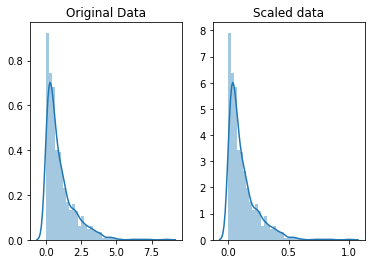

In [2]:
#  用指数分布生成100个数据
original_data = np.random.exponential(size=1000)

#  缩放数据0-1之间
scaled_data = minmax_scaling(original_data, columns=[0])

#  画图对比
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

### 归一化<br>
归一化改变了数据分布，使数据可以描述为正态分布。本处归一化采用的方法是Box-Cox变换（https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation）
![image.png](../res/img/box_cox.png)

Text(0.5,1,'Normalized data')

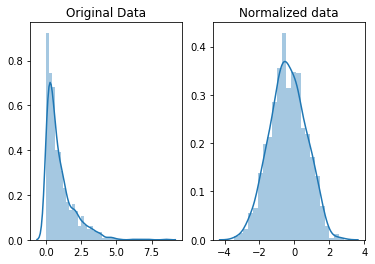

In [3]:
#  用boxcox归一化指数分布数据
normalized_data = stats.boxcox(original_data)
#  画图对比
fig, ax = plt.subplots(1, 2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

## 3、练习缩放<br>
使用的数据集为Kickstarter活动的数据集，Kickstarter是一个网站，可以邀请人们投资各种项目和概念产品。我们从缩放每个活动的目标开始，也就是他们被要求投资多少钱

Text(0.5,1,'Scaled data')

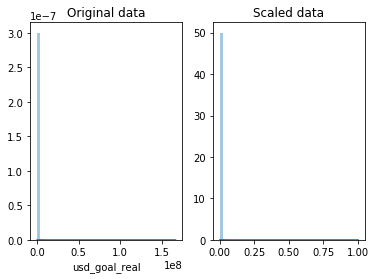

In [4]:
#  选择usd_goal_real列
usd_goal = kickstarters_2017.usd_goal_real

#  缩放目标范围为0-1
scaled_data = minmax_scaling(usd_goal, columns=[0])

#  画图对比
fig, ax = plt.subplots(1, 2)
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Text(0.5,1,'Scaled data')

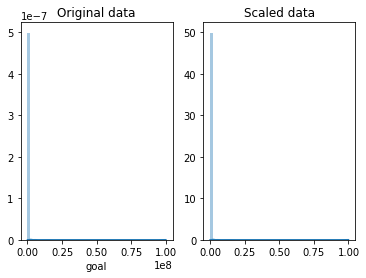

In [7]:
#  缩放goal列的数据
goal = kickstarters_2017.goal
scaled_data = minmax_scaling(goal, columns=[0])
fig, ax = plt.subplots(1, 2)
sns.distplot(kickstarters_2017.goal, ax=ax[0])
ax[0].set_title("Original data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

## 4、练习归一化

Text(0.5,1,'Normalized data')

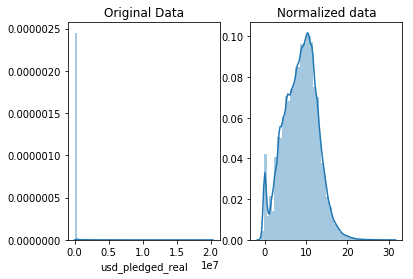

In [9]:
#  usd_pledged_real应该是用户实际投资
index_of_positive_pledges = kickstarters_2017.usd_pledged_real>0
#  获取usd_pledged_real>0的所有行。loc先行后列
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]
#  归一化
normalized_pledges = stats.boxcox(positive_pledges)[0]
#  画图对比
fig, ax = plt.subplots(1, 2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

Text(0.5,1,'Normalized data')

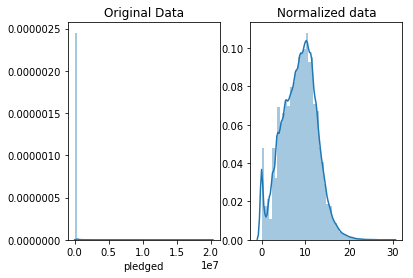

In [10]:
#  对pledged进行归一化
index_of_positive_pledgeds = kickstarters_2017.pledged>0
positive_pledgeds =  kickstarters_2017.pledged.loc[index_of_positive_pledges]
normalized_pledgeds = stats.boxcox(positive_pledgeds)[0]
fig, ax = plt.subplots(1, 2)
sns.distplot(positive_pledgeds, ax=ax[0])
sns.distplot(normalized_pledgeds, ax=ax[1])
ax[0].set_title('Original Data')
ax[1].set_title('Normalized data')